### Backtracking Linesearch Example

step 1: initialize a (value between 0 and 0.5), b (value between 0 and 1), x and t

step 2: iterate by updating t =b *t if the following is true

$$f(x^{(k)} - t \nabla f(x^{(k)})> f(x^{(k)})-at ||\nabla f(x^{(k)}||$$

else proceed to step 3

step 3: update $$x^{(k+1)} = x^{(k)} - t \nabla f(x^{(k)})$$

step 4: stop if $||\nabla f(x^{(k)})|| <\delta$ for some small  $\delta>0$ otherwise return to step 2

continue until convergence is achieved

good starting values are often a=0.1 to 0.3 and b=0.5 to 0.8.

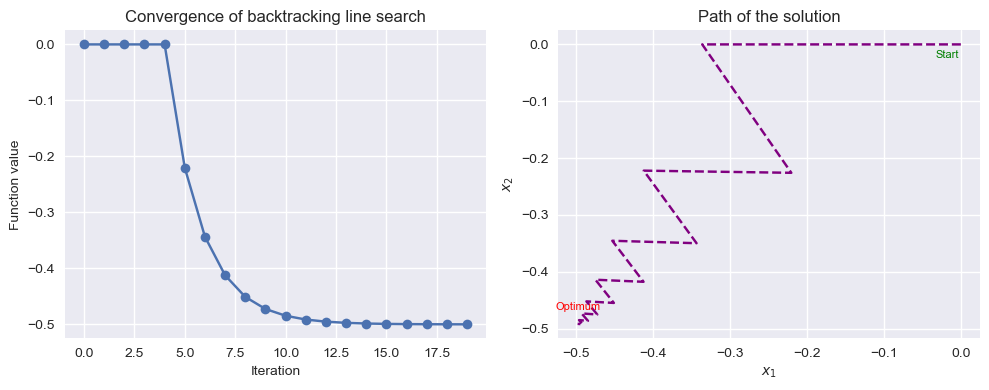

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

f = lambda x : 4*x[0]**2-4*x[0]*x[1]+2*x[1]**2+2*x[0]

def gradf(x):
    return np.array([8*x[0]-4*x[1]+2,4*x[1]-4*x[0]])

#initialize variables
t=1
x=np.array([0,0])
a=0.2
b = 0.7

# Create empty lists to store the function values and x-values
f_vals = []
x_vals = []

for i in range(20):
    #print(f't = {t} and x= {x} and f(x) = {f(x)}')
    if f(x-t*gradf(x))>f(x)-a*t*(gradf(x)[0]**2+gradf(x)[1]**2):
        t=t*b
    else:
        x=x-t*gradf(x)
    # Append the current function value and x-value to their respective lists
    f_vals.append(f(x))
    x_vals.append(x)

# Plot the function values
plt.style.use('seaborn')
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(f_vals, 'o-')
plt.xlabel('Iteration')
plt.ylabel('Function value')
plt.title('Convergence of backtracking line search')

# Plot the x-values
plt.subplot(1, 2, 2)
plt.plot([x[0] for x in x_vals], [x[1] for x in x_vals], 'x-',c='purple',linestyle='--')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Path of the solution')

# Annotate the starting and optimum points
plt.annotate('Start', (x_vals[0][0], x_vals[0][1]), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='green')
plt.annotate('Optimum', (x_vals[-1][0], x_vals[-1][1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()


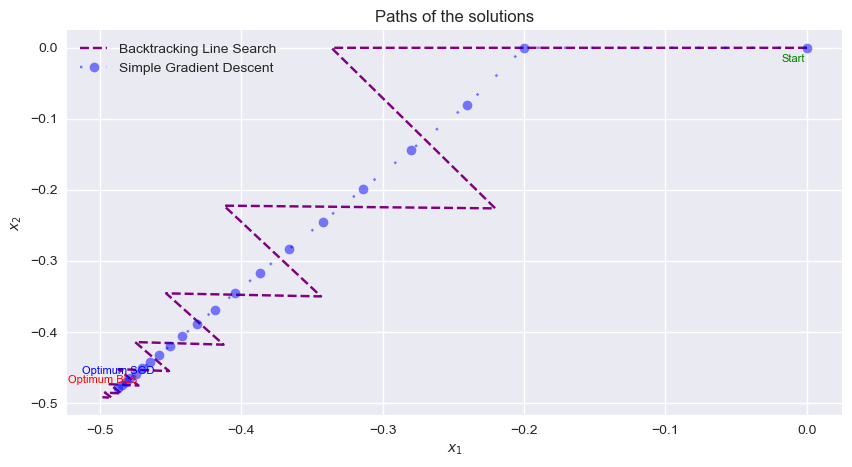

In [85]:
def simple_gradient_descent(gradf, init_x, learning_rate, num_iters):
    # Initialize variables
    x = init_x
    # Create an empty list to store the x-values
    x_vals = [init_x] # Start with initial value

    for i in range(num_iters):
        # Update x
        x = x - learning_rate * gradf(x)
        # Append the current x-value to the list
        x_vals.append(x)
        
    return x_vals

# Run simple gradient descent
init_x = np.array([0,0])
learning_rate = 0.1
num_iters = 20
x_vals_gd = simple_gradient_descent(gradf, init_x, learning_rate, num_iters)


x_vals = [init_x] + x_vals 

# Convert list of arrays to array
x_vals_gd = np.array(x_vals_gd)
x_vals = np.array(x_vals)


plt.figure(figsize=(10, 5))
plt.plot(x_vals[:, 0], x_vals[:, 1], 'x-',c='purple', 
         linestyle='--', label='Backtracking Line Search')
plt.plot(x_vals_gd[:, 0], x_vals_gd[:, 1], 'o-',c='blue',
         linestyle=(0,(1,10)), label='Simple Gradient Descent', alpha=0.5)

# Annotate the starting and optimum points
plt.annotate('Start', (x_vals[0][0], x_vals[0][1]), 
             textcoords="offset points", xytext=(-10,-10), ha='center',
             fontsize=8, color='green')
plt.annotate('Optimum BLS', (x_vals[-1][0], x_vals[-1][1]),
             textcoords="offset points", xytext=(0,10), ha='center',
             fontsize=8, color='red')
plt.annotate('Optimum SGD', (x_vals_gd[-1][0], x_vals_gd[-1][1]),
             textcoords="offset points", xytext=(0,10), ha='center', 
             fontsize=8, color='blue')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Paths of the solutions')
plt.legend()
plt.show()


### Frank-Wolfe Conditional Descent Algorithm

step 1: initialize $x^{(0)} \in X$

step 2: $ s= argmin $ $\nabla f( x^{(k)})^{T}s$

if $s = x^{(k)}$ terminate

step 3: $t_k = argmin f[(1-t_k)x^{(k)}+ts]$

step 4: $x^{(k+1)}=x^{(k)}+t_k*(s-x^{(k)})$

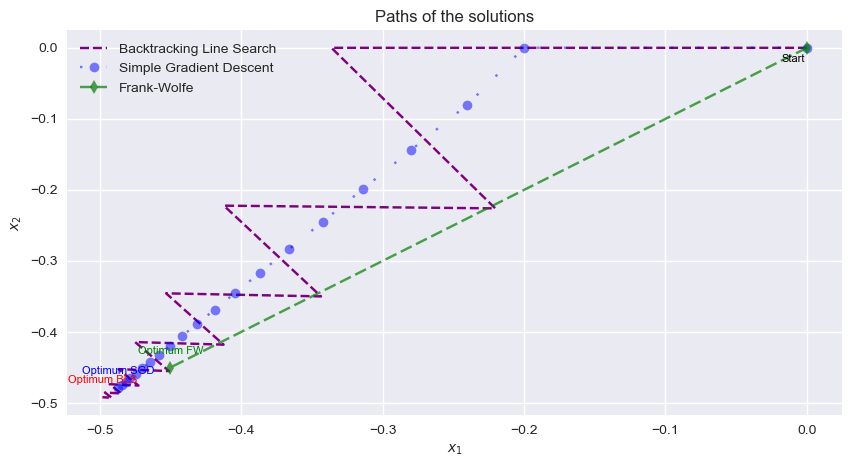

In [104]:
from scipy.optimize import minimize_scalar

from scipy.optimize import linprog

def frank_wolfe(f, gradf, x_init, X_constraints, num_iters):
    # Initialize variables
    x = x_init
    # Create an empty list to store the x-values
    x_vals = [x_init] # Start with initial value

    for i in range(num_iters):
        # Step 2: Minimize linear approximation of the function over X
        g = gradf(x)
        c = g
        bounds = X_constraints
        result = linprog(c, bounds=bounds)
        s = result.x
        if np.allclose(s, x):
            break
        # Step 3: Minimize over line segment
        t = 2 / (2 + i) # one choice for the step size
        # Step 4: Update x
        x = x + t * (s - x)
        x_vals.append(x)
        
    return x_vals


# Constraints for X
X_constraints = [(-0.45, None), (-0.45, None)] 

# Run Frank-Wolfe
init_x = np.array([0,0])
num_iters = 20 # Changed to 99 to keep total points 100 (including starting point)
x_vals_fw = frank_wolfe(f, gradf, init_x, X_constraints, num_iters)


# Convert list of arrays to array
x_vals_fw = np.array(x_vals_fw)

# Plot the paths
plt.figure(figsize=(10, 5))
plt.plot(x_vals[:, 0], x_vals[:, 1], 'x-',c='purple', linestyle='--', label='Backtracking Line Search')
plt.plot(x_vals_gd[:, 0], x_vals_gd[:, 1], 'o-',c='blue', linestyle=(0,(1,10)), label='Simple Gradient Descent', alpha=0.5)
plt.plot(x_vals_fw[:, 0], x_vals_fw[:, 1], 'd-',c='green', linestyle=(0,(5,2)), label='Frank-Wolfe', alpha=0.7)

# Annotate the starting and optimum points
plt.annotate('Start', (x_vals[0][0], x_vals[0][1]), textcoords="offset points", xytext=(-10,-10), ha='center', fontsize=8, color='black')
plt.annotate('Optimum BLS', (x_vals[-1][0], x_vals[-1][1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')
plt.annotate('Optimum SGD', (x_vals_gd[-1][0], x_vals_gd[-1][1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='blue')
plt.annotate('Optimum FW', (x_vals_fw[-1][0], x_vals_fw[-1][1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='green')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Paths of the solutions')
plt.legend()
plt.show()


Simple Example with univariate function 

$f = (x-2)^2$

$\nabla f(x) = 2(x-2)$

In [107]:
x=0.25
t=1
a=0.2
b=0.6
iterations = 0
sgdpoints = []
blspoints=[]
def iterate(t):
    while f(x-t*gradf(x,f))>f(x)-a*t*gradf(x,f)**2:
        t=t*b
    return t

print("<backtracking line search>")
while  abs(t*gradf(x,f))>0.01:
   
    iterations+=1    
    t=iterate(t)
    x=x-t*gradf(x,f)
    blspoints.append((x,f(x)))
   
print(f"iterations to reach minimum {iterations}")
print("\n <simple gradient descent> with learning rate 0.001")

x=0.25
iterations = 0
while  abs(0.1*gradf(x,f))>.01:
    iterations+=1   
    x=x-0.1*gradf(x,f)
    sgdpoints.append((x,f(x)))
print(f"iterations to reach minimum {iterations}")



<backtracking line search>
iterations to reach minimum 4

 <simple gradient descent> with learning rate 0.001
iterations to reach minimum 16


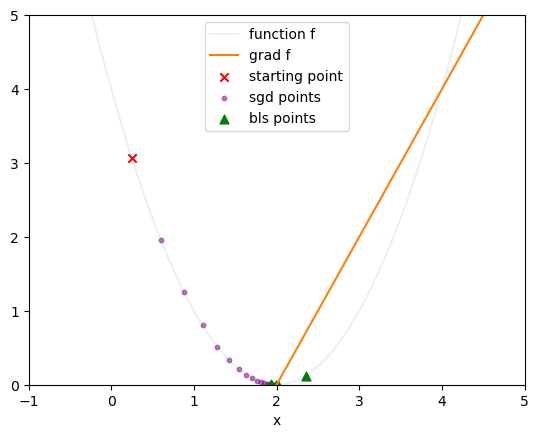

In [111]:
import numpy as np
import matplotlib.pyplot as plt
f = lambda x: (x-2)**2
x=np.linspace(-1,5,100)
plt.plot(x,f(x),label='function f',alpha=0.1)

plt.xlim(-1,5)
plt.ylim(0,5)
def gradf(x,f):
    e = 1/10**10
    return (f(x+e)-f(x))/e
plt.plot(x,gradf(x,f),label='grad f')
plt.scatter(0.25,f(0.25),label='starting point',color='red',marker='x')
plt.scatter([i[0] for i in sgdpoints],[i[1] for i in sgdpoints],label='sgd points',c='purple',s=10,alpha=0.5)
plt.scatter([i[0] for i in blspoints],[i[1] for i in blspoints],label='bls points',c='green',s=40,marker='^')

plt.xlabel('x');
plt.legend();plt.show()